# Introduction: Welcome to CASA

Welcome to `CASA` - The Common Astronomy Software Applications Package, a very powerful tool in the field of radio astronomy! 

In this comprehensive guide, tailored for the novice researchers, we will explore the essentials of imaging radio telescope data. This guide will walk you through the steps of imaging the data set and explain the significance of each process. We will image a protoplanetary Disk, MWC 480, utilizing data from MAPS. The techniques you learn and practice here can be applied to other data sets, imaging different astronomical objects. After imaging MWC 480 in this guide, you can practice your skills by imaging a data set from the curated list, with a few pointers! (this part is a work in progress) 

This guide was designed by Claire Thilenius under the guidance of Abby Waggoner. 

In this guide you will learn:
   - Introduction - This Notebook! 
       - What is a Radio Telescope?
       - What is an Interferometer? 
       - What Form Does Interferometer Data Take? 
   - How To Clean Radio Telescope Data with CASA - This Notebook! 
       - Use `tclean` 
       - Change Parameters in `tclean`
   - How to Clean Continuum and Line Data - CASAGuideCleaning.ipynb 
       - Create a Dirty Image
       - Calculate Threshold
       - Clean Continuum Data
       - Clean Line Data
   - Display your Data - CASAGuideCleaning.ipynb 
        - Create an All Channels Map
        - Create a Moment 0 Map 
        - Plot Spectra
   - Use These Methods to Clean and Image Your Own Data - Work In Progress
       - Learn how to read `listobs`
       - Learn how to automask data
       
For more information about `CASA` Read the Docs: https://casadocs.readthedocs.io/en/v6.5.6/index.html

The CASA Team, et al., “CASA, the Common Astronomy Software Applications for Radio Astronomy”, PASP, 134, 114501. DOI: 10.1088/1538-3873/ac9642


# Introduction Key Questions: 
- Where Does Our Data Come From? 
- What is interferometry? 
- How do different telescope Configurations change data? 
- What form does our data take? 

## Where Does Our Data Come From? 
Radio Telescopes! 

Radio telescopes work very similarly to optical telescopes, they collect photons and focus them to a receiver. The key difference is the type of light radio telescopes collect. Radio telescopes collect very low energy photons in the 3 kilohertz and about 900 gigahertz range[<sup>1</sup>](https://public.nrao.edu/radio-astronomy/the-science-of-radio-astronomy/#:~:text=Radio%20astronomers%20are%20most%20interested,than%20a%20millimeter%20in%20length), which we call radio waves.
<p style="text-align: center;">
<img align="center" width="450" src="./Images/EM_spectrum_compare_level1.jpg"> </p>
 
*Figure 1:The Eclectromagnetic Spectrum [<sup>2</sup>](https://imagine.gsfc.nasa.gov/science/toolbox/emspectrum1.html).*


|Radio Telescope Antenna [<sup>3</sup>](https://www.sciencedirect.com/science/article/pii/S0925231216314229)|Optical Telescope[<sup>4</sup>](https://en.wikipedia.org/wiki/Cassegrain_reflector#/media/File:Cassegrain.en.png)|
|:-:|:-:|
|<img align="center" width="300" src="./Images/RadioTeleDiagram.jpg">|<img align="center" width="350" src="./Images/OpticalScopeDiagram.png">| 


Radio Telescopes come in many sizes, from a dipole antenna that can fit in your backyard [<sup>5</sup>](https://www.saasst.ae/index.php/hm/drt#:~:text=One%20of%20the%20simplest%20types,The%20antenna%20unit) to the Green Bank Telescope (GBT), the largest moving structure on land! 

|SAASST Decametric Radio Telescope [<sup>6</sup>](https://www.saasst.ae/index.php/hm/drt#:~:text=One%20of%20the%20simplest%20types,The%20antenna%20unit)|Green Bank Radio Telescope [<sup>7</sup>](https://public.nrao.edu/telescopes/gbt/).|
|:-:|:-:|
|<img align="right" width="400" src="./Images/dipolescope.jpg">|<img align="center" width="400" src="./Images/GBT_radio.jpg">| 


<img align="right" width="400" src="./Images/NRQZ.jpg">
The SAASST Decametric Radio Telescope primarily observes the Sun and Jupiter, which are very noisy in the radio regieme. The GBT can observe much fainter radio signals. Radio waves are long and low energy, so radio telescopes have to be large and isolated to observe things beyond the solar system. Radio telescopes are extremely prone to noise.

Why can't you have a microwave in Green Bank West Virginia? The GBT will detect it! The area around Green Bank is the National Radio Quiet Zone
[<sup>8</sup>](https://www.gb.nrao.edu/rumpus/qz.shtml), there is limited cell signal and wifi, and close to the telescope, even microwave ovens are prohibited! If you take a tour of the telescope grounds you will have to leave all electronic devices turned off or in a farday cage to keep them from causing radio noise. 

INSERT Astro Club Radio Telescope pictures?


## Why Are Radio Telescopes Useful?
<img align="right" width="400" src="./Images/NGC6964-1.jpg">

Radio telescopes are extrodinarily useful for studying things we can't see in visual light. Dust clouds might be opaque to optical light, but they are transparent to radio! We can see through dust and find hidden structures. 

The image to the right shows an optical image and a radio image of NGC6964 at the same scale. You can see that the Galaxy's spiral arms extends far beyond what we see in the optical image. This is the power of radio waves! 

Even objects that we are very familar with look much different in radio, what do you thing this object is? 

Image Credit (Right): Punzo et al.  [<sup>9</sup>](https://www.kitware.com/introducing-slicerastro-a-visualization-tool-for-hydrogen-in-galaxies/)

Image Credit (Below): NRAO [<sup>10</sup>](https://public.nrao.edu/gallery/jupiter-in-radio-waves/)

<img align="center" width="200" src="./Images/Jupiter_VR48_hi_large.jpg">



It is Jupiter in Radio! 



Punzo, D., Hulst, J. M. van der, Roerdink, J., & Fillion-Robin, J.-C. (2016, July 21). Introducing SlicerAstro: A visualization tool for hydrogen in Galaxies. Kitware Inc. https://www.kitware.com/introducing-slicerastro-a-visualization-tool-for-hydrogen-in-galaxies/ 

### Earth's Atmosphere

<img align="right" width="400" src="./Images/RadioAtmosphere.jpg"> The atmosphere is transparent to most radio waves! [<sup>11</sup>](https://www.cv.nrao.edu/~sransom/web/Ch1.html)

Water in the atmosphere reduces the transmission of radio waves, so we want our radio telescopes to be high and dry! Water vapor in the air can cause absorption of some of the radio waves, meaning our telescopes don't capture everything. Radio telescopes are typically built at high altidudes, so they are looking through less atmosphere. Oxygen, CO<sub>2</sub>, and other gasses in the atmosphere also absorb radio waves. 

For this guide we will use Data from ALMA (Atacama Large Millimeter/Submillimeter Array) Which is an "array" of telescopes, these telescopes work together through interferometry to create the data that we analyze. Alma is located on the Chajnator plateau in Chile. At 16,000 feet, the telescopes are very high and dry! 

<p style="text-align: center;">
<img align="center" width="400" src="./Images/Four_antennas_ALMA.jpg"> </p>
https://earthsky.org/space/worlds-biggest-astronomy-project-alma-telescope/

[Learn more about ALMA! Including interactive 3D model of an ALMA Antenna](https://public.nrao.edu/telescopes/alma/)

## What is Interferometry?
https://www.eso.org/public/announcements/ann15015/
<img align="right" width="400" src="./Images/ann15015a (1).jpg">
Interferometry is a very powerful technique used to enhance the resolution of images. We take the signals from multiple radio telescopes observing at the same time to simulate a much larger single dish telescope. Astronomers can achieve much higher resolution than what we could get with a single dish.  


*"Baseline"* describes the separation between 2 individual telescopes. ALMA can have baselines up to 16 km, this means we can simulate a dish that is 16 km across! Currently the largest single dish telescope is the Five-hundred-meter Aperture Sphereical Telescope (FAST) in China. ALMA can simulate a telescope 32 times the size of FAST, but there are benefits to both types of telescopes. 

Image Credit (Right): ESO  [<sup>12</sup>](https://www.eso.org/public/announcements/ann15015/)

Image Credit (Below): Sky and Telescope [<sup>13</sup>](https://skyandtelescope.org/astronomy-blogs/black-hole-files/how-does-very-long-baseline-interferometry-work/)

The Event Horizon Telescope, that observes Black holes both in our Galaxy and in M87 is an interferometer, consisting of telescopes spread across the world. 

<img align="center" width="400" src="./Images/EHT2017_stations_PaperI_Fig1_600px-356x360.jpg">
These telescopes give us the famous images of Sagitarius A* and M87's Black Hole! 

Interferometers attempt to balance their spatial resolution and spectral resolution. We can use ALMA in different configurations, some where the antenni are clustered together, or spread very far apart. This changes how we image the object. 

When telescopes work together as an interferometer, we can get "better" images. But what does *"better"* mean? It depends on what object you're looking at, and what you are studying. Different telescope configurations give different results, so researchers must choose the best configurations for their proposals. 


## How Do Different Telescope Configurations Change Data? 
Telescope configurations change how we view the data. When selecting a configuration, you must determine what spatial resolution and sensitivity you need for your target. 

The resolution of a telescope describes how far two objects can be for the telescope to be able to tell them apart. 

Its like looking at two candles from a mile away. When the candles are a few inches apart, they look like one light. But when they are further 500 feet apart, you can "resolve" them as two light sources. If you have glasses, you might be more familar with resolution! When you take off your glasses, your resolution goes down! 

The resolution of an array is defined by its baseline, where a long baseline means more resolution! 

The sensitivity of a telescope is how well it can detect a source above the back ground level. Returning to the candle example, if you are looking out at the candeles at night, you can easily see them. However, if we look out at the candles during the day when the sun is out, it will be much more difficult to distiguish the candle from its surroundings. Space is noisy! There are radio waves everywhere! so the telescope array needs to be sensitive enough to distinguish your "candle" from the rest of the sky. 

Sensitivity is defined by the effective area of the array, the number of antennas times their area. 

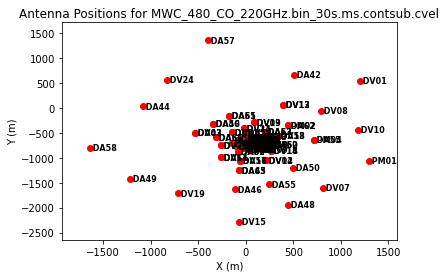

In [1]:
#Run me to see what this observations antenna configuration looked like! 
#to easily run cells, select the cell then press shift+enter 
from casatasks import plotants
plotants('MWC_480_CO_220GHz.bin_30s.ms.contsub.cvel')

## What form does our Data take? 

<img align="right" width="400" src="./Images/Loomis_ImageCube.jpg">

From radio telescopes, we get measurement sets (file extension .ms) which consist of image cubes.  The cube consists of velocity channels. For this example we will use a protoplanetary disk. The disk is rotating around the central star, so some of the material is moving towards the telescope and some is moving away. The channels show the material moving at a distinct velocity. If you collapse the channels together, you get a moment 0 map. If you extract a single pixel or a region (aperature or mask) from each channel, you can extract spectra. 

Image Credit (Right): Lomis et al.  [<sup>14</sup>](https://iopscience.iop.org/article/10.3847/1538-3881/aab604)

Loomis, R. A., Öberg, K. I., Andrews, S. M., Walsh, C., Czekala, I., Huang, J., & Rosenfeld, K. A. (2018). Detecting Weak Spectral Lines in Interferometric Data Through Matched Filtering. The Astronomical Journal, 155(4), 182. https://doi.org/10.3847/1538-3881/aab604 

## The Anatomy of Our Data

#### What is a Protoplanetary Disk?
In this guide we will be imaging the Protoplanetary Disk MWC 480. A protoplanetary disk is a forming solar system. Protopalnetary disks consist of a huge cloud of gas and dust rotating around a central star. As the cloud rotates, it flattens out in to a disk. The formation of solar systems is much like a pizza maker throwing the dough in the air, as it spins, it flattens out into the disk-like pizza shape. Eventually the dust and gas in these protoplanetary disk will either coallesce to form planets or fall into the star.  

Since the Disk is spinning, we see some of the material coming towards us, and some moving away. The Doppler effect comes into action. The material coming towards us is blue-shifted, while the material moving away from us is red shifted, which we can see in the velocity channels. 

#### What are channels?
In line data, we will have channels, in our continuum data we will not. But, what are channels? In the Image Cube shown in the cell above, you see a horizontal set of images. These images represent the channels. They show the same point in space, but imaging different velocities. Each slice shows a specific velocity, either moving towards us, away from us, or not moving relative to us. We can only detect the movement towards or away from us. The Doppler effect does not give us any information about how the material might be moving to the left or right. 

#### What is the "Beam" 
The beam is a tricky thing to define without alot of math. For simplicity, think of the beam as what defines the spatial resolution. A smaller beam will give us better resolution, while a larger beam will give us worse spatial resolution. Here we show the same disk, imaged by two different radio telescopes, ALMA and SMA. SMA uses a larger beam, which gives us an image that appears more 'blobby'. 

#### What is Noise? 
When we clean the data, our goal is to get rid of the noise in the data. Noise is a broad term for anything that is not the object we are looking at. The noise might be radio emission from surrounding objects, water in our atmosphere, or the Cosmic Microwave Background of the sky. We can subtract out the noise by cleaning the data and identifying what is real emission from our object vs. what is noise. 

#### What is Emission?
Emission is the radiation coming from the source we are interested in. In this case we are looking at continuum or line emission from MWC 480. For continuum we are looking at a small region of frequencies, for line emission in this guide, we are looking at just CO emission. Continuum emission will show us where the 'brightest' regions are, while line emission will tell use where CO is in the disk. 

## Continuum, Line, and Spectra
There are three ways we will look at our data. Continuum Emission, Line emission, and spectra. 

A continuum is a range of frequencies over which we are measuring the "brightness" against the background. The continuum spectra should not have lines in it. If it has a line, we will remove it. In the image below, the bottom row shows continuum emission from protoplanetary disks. 

<img align="center" width="500" src="./Images/MAPS_DATA.jpg">

Top: 12CO 2-1 integrated intensity images from MAPS.
Bottom: Millimeter continuum images from DSHARP (IM Lup, AS 209, HD 163296), Huang et al. 2020 (GM Aur), and MAPS (MWC 480)[<sup>15</sup>](https://alma-maps.info/disks.html).

Line emission is emission at a very specific frequency. The first step in imaging line emission is to remove the continuum from the data (continuum subtraction -> contsub. When looking at line emission, we are looking at a specific molecule in the disk. We can determine where this molecule is present in the disk, and how much of it there is in the disk. In the image above, you can see the line emission from CO in the top panel. Certain molecules can be used to "trace" certain phenomena or features of the disk. CO is often very abundant in protoplanetary disks, and it emits brightly at a frequency we can easily detect. CO is very useful for determining the mass of the gas in the disk. [<sup>16</sup>](https://iopscience.iop.org/article/10.3847/1538-4357/aa9227)


Imaging the spectra requires imaging the line. We can create a spectra from the line emission data looking at a specific region of the data where the line emission is present and looking at the brightness of the emission. 


For this guide we will use an observation of the CO molecule in MWC 480, a protoplanetary disk.

The data set we will use is part of the [Molecules with ALMA at Planet-forming Scales (MAPS) Project](https://alma-maps.info/index.html). 


Molyarova, T., Akimkin, V., Semenov, D., Henning, T., Vasyunin, A., & Wiebe, D. (2017). Gas mass tracers in protoplanetary disks: CO is still the best. The Astrophysical Journal, 849(2), 130. https://doi.org/10.3847/1538-4357/aa9227 


# Cleaning Data

A note about our data: 
The MAPS DATA of CO in MWC 480 is very bright emission and very clean from noise. You will likely encounter data that is "dirtier," it has more background noise, images from dirtier data will create dirtier images. 

Key Questions 
- How do we clean Continuum Data? 
- What Parameters effect cleaning? 
    - The Mask
    - The Threshold
    - The Robust
    - The Weighting
    - The Channel Size 
    - The number of Channels. 


We will discuss cleaning the Continuum and the Line emission separetly, but the process is very similar. 
1. We will define our parameters
2. We will create a dirty image
3. We will calculate the noise level in the dirty image
4. We will clean the image
5. We will look at the cleaned image as a movie, a plot of all channels, and a Moment Zero Plot. 

### First, What do we need to clean? 
Shown below are the dirty and cleaned CO line emission images respectivly. 

In the dirty image you can see some artifacts and noise present as streaks or bright spots. The cleaning process will remove these and leave a nice pretty image, like the one shown below on the right. 

|Dirty Image|Cleaned Image|
|:-:|:-:|
|<img src="./Images/overclean.dirt.fits.gif" width="500" height="250"/>|<img src="./Images/overclean.img.fits.gif" width="500" height="250"/>| 


Another way we can look at the data is to look at the residuals from a cleaned image. These are the left overs after the cleaning process. The risiduals are everything that was removed from the cleaned image. Ideally they should just be noise. Here are the residuals from an undercleaned, a well cleaned, and an overcleaned image.

Notice that the undercleaned image still has residual emission that we know is real. In this case it is presented as a yellow blob in the shape of our emission. The cleaned image just has noise in its residuals, meaning that we cleaned out everything that is real emission. Finally, the over cleaned has a "hole" where the emission was. In overcleaning we falsely assume that the background noise is real emission. 

|Undercleaned| Cleaned |Overcleaned|
|:-:|:-:|:-:|
|<img src="./Images/MWC_480_Display.residual.fits.gif" width="250" height="250"/>|<img src="./Images/overclean.res.fits.gif" width="250" height="250"/>|<img src='./Images/overclean.res.fits.gif' width="250" height="250"/>| 

* include moment 0 maps under these



### Your new best friend: tclean
```tclean``` is a function in CASA that cleans the data. 
tclean takes many parameters, in this guide we will define a few that are important for cleaning data. 

Here is the tclean code that we will use to clean line emission. 
```python
tclean(    vis= 'MWC_480_CO_220GHz.bin_30s.ms.contsub.cvel',
           imagename= 'filename',
           mask= 'maskname',
           field= '0' ,
           specmode='cube',
           spw= '0',
           restoringbeam='common',
           outframe= 'LSRK',
           interpolation='linear',
           veltype='radio',
           restfreq= '230.5380000000GHz',
           niter=500000,
           threshold=thres,
           interactive= False,
           cell='0.05arcsec',
           imsize=[400,400],
           weighting= 'briggs,
           gridder= 'standard',
           robust= 0.5,
           nchan = nchan,
           width = width,
           start = start)
```

Lets define each parameter: 

| Parameter Name | Description |
| :-------------- | :----------- |
| `vis` (str) | Short for visibility, this parameter represents our observation dataset. It refers to the "measurement set" file with the ".ms" file extension. In this guide, we'll use 'MWC_480_CO_220GHz.bin_30s.ms.contsub.cvel'. |
| `imagename` (str) | This is the name assigned to the created image. It serves as a prefix for all files generated during the cleaning process. Choose a descriptive name that reflects the imaging parameters used. |
|`maskname`(str)|Name of the masked used to mark the "real" emission.|
| `specmode` (str) | Specifies the imaging mode; use "mfs" (multi-frequency synthesis) for continuum imaging and "cube" for line imaging. |
| `deconvolver` (str) | Specifies the deconvolution algorithm; we'll use 'hogbom'. |
| `niter` | Number of iterations for tclean. Too low may result in insufficient cleaning, while too high increases processing time. We'll use 500,000 to ensure adequate cleaning. |
| `robust` (float) | Determines the robustness for Briggs weighting, where -2.0 gives uniform weighting and +2.0 gives natural weighting. |
| `threshold` (str) | The cleaning level. It's crucial to set it appropriately to avoid undercleaning or overcleaning. Measured in Janskys, we'll calculate it based on the dataset's noise level. |
| `interactive` (bool) | When set to true, activates the interactive module in CASA for user-drawn masks. We'll set it to false since we're using automatically generated masks. |
| `cell` (str) | Designates the pixel size. Generally set to about 5-8 pixels across the dirty beam. Example: '0.05 arcsec'. |
| `weighting` (str) | Different weightings prioritize different aspects of the image, such as sensitivity and resolution. XX (Provide specific information or example weightings.) |
| `imsize` (list) | A two-element list specifying the size of the image in pixels. Determined by the size of the beam. Example: [400, 400]. |


Line Emission requires more parameters since we have an image cube. We have to define over what range of velocities we will be imaging. The radio telescope data is essentially continuous over a range of velocities, so we must bin the data into channels and determine where in the range of data to start imaging. 

| Parameter Name | Description |
| :-------------- | :----------- |
| `restfreq` | The rest frequency for spectral data, set to the frequency of the line emission. |
| `start` | Start frequency or velocity for imaging, indicating where in the range of velocities imaging will begin. |
| `nchan` | Number of channels to be imaged. |
| `width` | Width of each channel. |


https://science.nrao.edu/facilities/alma/naasc-workshops/nrao-cd-berkeley19/08_imaging.pdf


For more information on `CASA` and the tclean parameters see https://casadocs.readthedocs.io/en/v6.5.6/index.html

nchan
chan width 
image size
cell size 

#### How Does Threshold Effect the Image? 
The threshold is the level to which the tclean cleans the image. To think about the threshold, we are going to thing about the residuals. When we clean an image we identify what is 'real' and what is noise. When we clean an image we take out more and more noise until all we have left is a clean image. The residuals are everything we have removed from the image. If we clean the image well, the residual map should just be a random distribution. 

In this guide we will set our threshold by determining what the noise is from the dirty image (image with no cleaning). We will set our threshold to be 3 sigma of the noise level. 3 sigma is a good starting point for cleaning this data. 

##### What happens if I set the threshold too high or too low? 
- If you set the threshold too low, you will underclean the image. tclean will stop before it has removed all of the noise, and you will be left with a dirty image. 
- If you set the threshold too high, tclean will take forever! tclean may also overclean the image. tclean will consider real emission to be noise and remove it. 

#### How Weighting Effects the Image?

There are 3 common choices for weighting: Natural, Uniform, and Briggs. Each weighting has its trade offs, as shown in the diagram below: 

<img align="center" width="500" src="./Images/weightingTrades.PNG">

By changing the weighting of the data, we change how the data looks.  

Weightings can be adjusted to achieve science goals. For disks, we traditionally use Briggs which consists of another parameter robust. 

<img align="center" width="500" src="./Images/weightings.PNG">

#### How Does Robust Effect the Image?
Robust is the robustness parameter for Briggs weighting. Robust can vary between +2.0 and -2.0, -2.0 is a uniform weighting, and +2 is a natural weighting. Where everyting in between is something in between. Generally a robust of 0.5 is used. 


### The Mask
Before we begin, we need to select a mask. 

The mask is vital to cleaning. When we mask the emission, we are selecting what emission is real. 

A mask is a user selected area that we determine has real emission in it. We will mask the emission and not the noisy background. We are essentially helping `CASA` determine what is real (what we want to keep) vs. what is background noise or image artifacts. 

The mask can be auto-generated, which we will try when you create your own image from a new data set, or it can be drawn by hand. 
For ease three masks have been generated for you. A large, small, and a medium mask. 

|BIG|MEDIUM|SMALL|
|:-:|:-:|:-:|
|<img src="./Images/HugeMask.fits.gif" width="250" height="250"/>|<img src="./Images/MedMask.fits.gif" width="250" height="250"/>|<img src="./Images/TightMask_im400_cell0.05.mask.fits.gif" width="250" height="250"/>|

You will not be making a mask for this guide, but using masks that have been premade for you. Run the cell below to watch a short clip of Claire Making the tight mask you see in the example table above. This video is speed up by 16 times! It takes time to make a mask!! While Jupyter Notebooks does not support hand drawing your own mask, in the Make Your Own Image Section of this guide you can try automasking. Automasking looks creates a mask from the emission with given parameters.  
 


In [2]:
from IPython.display import Video
Video("./Images/MakeMask.mp4")
#Here Claire lazily creates a tight mask to demonstrate how mask shapes can capture the emission (or in this case leave some emission out). 
#creating a mask takes time, and creating a good mask takes even more time! 

Now that you have a good overview of the cleaning process, lets give it a try! Move on to either the Continuum Cleaning or the Line Cleaning Jupyter Notebook. 

# Sources
1. https://public.nrao.edu/radio-astronomy/the-science-of-radio-astronomy/#:~:text=Radio%20astronomers%20are%20most%20interested,than%20a%20millimeter%20in%20length
2. https://imagine.gsfc.nasa.gov/science/toolbox/emspectrum1.html
3. https://www.sciencedirect.com/science/article/pii/S0925231216314229
4. https://en.wikipedia.org/wiki/Cassegrain_reflector#/media/File:Cassegrain.en.png
5. https://www.saasst.ae/index.php/hm/drt#:~:text=One%20of%20the%20simplest%20types,The%20antenna%20unit
6. https://public.nrao.edu/telescopes/gbt/
7. https://www.gb.nrao.edu/rumpus/qz.shtml
8.
9.
10.
11.
12.
13.
14.
15.
16.
